In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
from tb import *

In [2]:
tb = TB(config_file='config_gbv.ini',device_name='CO2')

["cdm4160","cjmcu811","fatal","heartbeat","loadavg1","loadavg15","loadavg5","mh-z14a","notice","s8lp","scd30","sen0219","sen0219avg","sen0219cma","sen0220","t3022","uptime","uptime-linux"]


In [3]:
sensores = ["s8lp","sen0220","t3022","scd30"]

# sensores = ["cdm4160","cjmcu811","sen0219","t3022","mh-z14a","sen0220","s8lp"]
datos = pd.concat([tb.get_df(key=sensor) for sensor in sensores],axis=1)
# print(datos.head())
datos.index = datos.index + pd.Timedelta("-5H")
datos.tail()

s8lp  sen0220  t3022  scd30
ts                                                   
2021-07-21 05:29:54.095  516.0      NaN    NaN    NaN
2021-07-21 05:29:56.312    NaN    461.0    NaN    NaN
2021-07-21 05:30:50.161    NaN      NaN    NaN  478.0
2021-07-21 05:30:54.036  512.0      NaN    NaN    NaN
2021-07-21 05:30:56.393    NaN    462.0    NaN    NaN

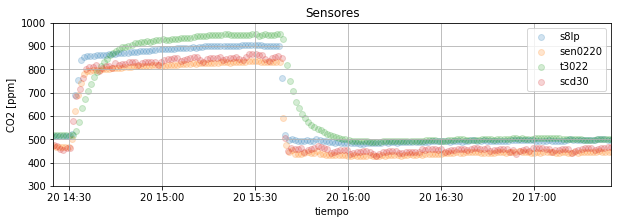

In [10]:
# sensores = ["cdm4160","cjmcu811","sen0219","t3022","mh-z14a","sen0220","s8lp"]
sensores = ["s8lp","sen0220","t3022","scd30"]
# ref = "fluke"

fig, ax = plt.subplots(figsize=(10,3))

fecha1 = parse("2021-07-20 14:25") 
fecha2 = fecha1 + pd.Timedelta("3H")
ax.set_xlim(fecha1,fecha2)

ax.set_ylim(300,1000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

for sensor in sensores:
    ax.scatter(datos[sensor].index,datos[sensor],label=sensor,alpha=0.2)

ax.legend()



In [11]:
#corta los datos de la fecha inicial al final
datos = datos.truncate(before="2021-07-20 14:30:04",after="2021-07-20 15:31:04")
datos

s8lp  sen0220  t3022  scd30
ts                                                   
2021-07-20 14:30:15.084    NaN      NaN  517.0    NaN
2021-07-20 14:30:19.894    NaN      NaN    NaN  462.0
2021-07-20 14:30:54.783    NaN    499.0    NaN    NaN
2021-07-20 14:30:58.579  522.0      NaN    NaN    NaN
2021-07-20 14:31:14.649    NaN      NaN  520.0    NaN
...                        ...      ...    ...    ...
2021-07-20 15:29:58.717    NaN    835.0    NaN    NaN
2021-07-20 15:30:14.250    NaN      NaN  950.0    NaN
2021-07-20 15:30:15.288    NaN      NaN    NaN  864.0
2021-07-20 15:30:54.259  906.0      NaN    NaN    NaN
2021-07-20 15:30:58.790    NaN    834.0    NaN    NaN

[241 rows x 4 columns]

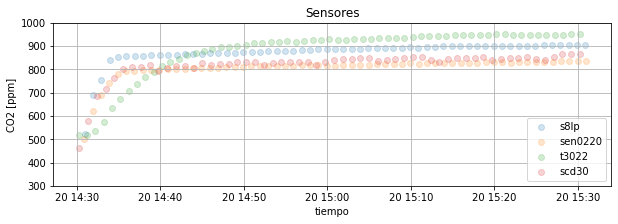

In [12]:
# sensores = ["cdm4160","cjmcu811","sen0219","t3022","mh-z14a","sen0220","s8lp"]
sensores = ["s8lp","sen0220","t3022","scd30"]
# ref = "fluke"

fig, ax = plt.subplots(figsize=(10,3))

# fecha1 = parse("2021-07-20 14:25") 
# fecha2 = fecha1 + pd.Timedelta("3H")
# ax.set_xlim(fecha1,fecha2)

ax.set_ylim(300,1000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

for sensor in sensores:
    ax.scatter(datos[sensor].index,datos[sensor],label=sensor,alpha=0.2)

ax.legend()



In [13]:
#ajustar fecha si es necesario
datos.to_csv("../data/sensores_20-07-2021.csv")